**Importing libraries**

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

**Importing Data from .csv file**

In [87]:
columns=["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"]
dataset = pd.read_csv('dataset.csv',names=columns)
dataset.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
dataset.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [89]:
dataset.shape

(150, 5)

# Data Analysis
<hr>

**Petal length**

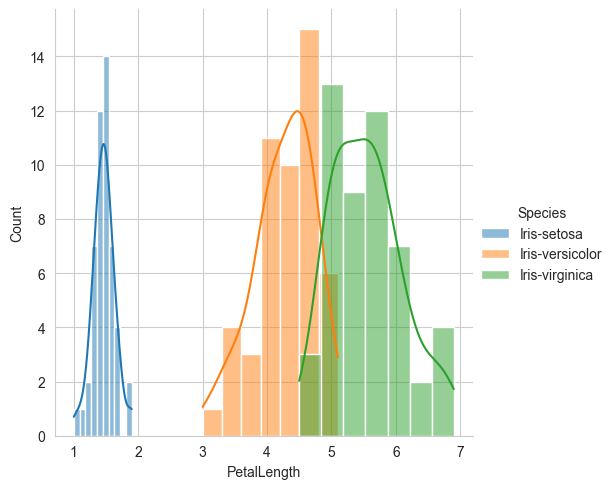

In [90]:
sns.FacetGrid(dataset,hue="Species",height=5) \
    .map(sns.histplot,"PetalLength",kde=True) \
    .add_legend()
plt.show()

**Petal width**

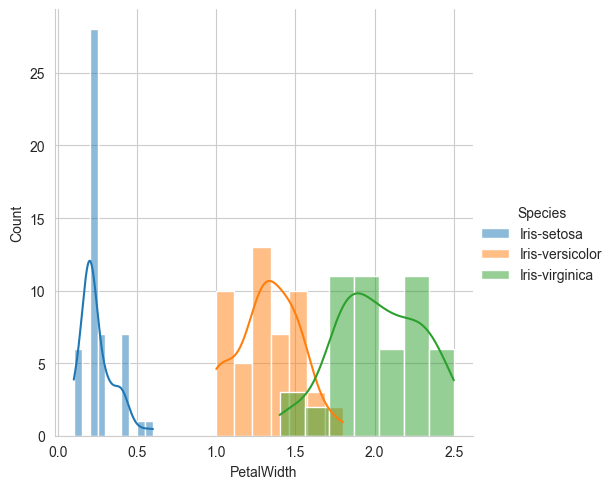

In [91]:
sns.FacetGrid(dataset,hue="Species",height=5) \
    .map(sns.histplot,"PetalWidth",kde=True) \
    .add_legend()
plt.show()

**Sepal length**

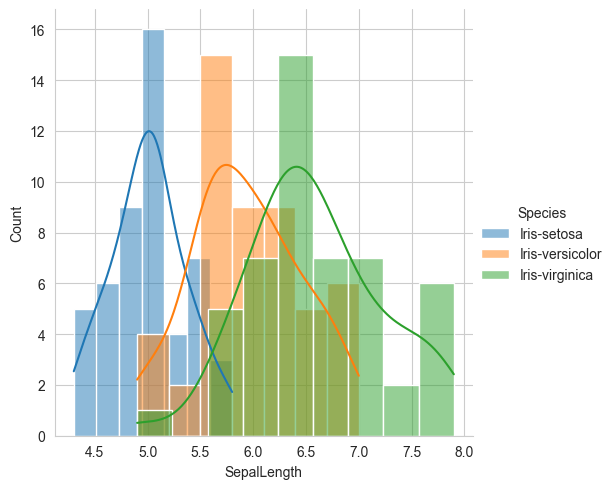

In [92]:
sns.FacetGrid(dataset,hue="Species",height=5) \
    .map(sns.histplot,"SepalLength",kde=True) \
    .add_legend()
plt.show()

**Sepal width**

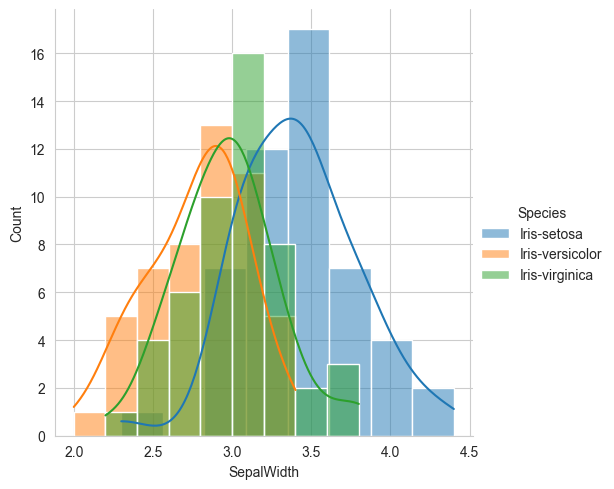

In [93]:
sns.FacetGrid(dataset,hue="Species",height=5) \
    .map(sns.histplot,"SepalWidth",kde=True) \
    .add_legend()
plt.show()

**2D Scatter plot**

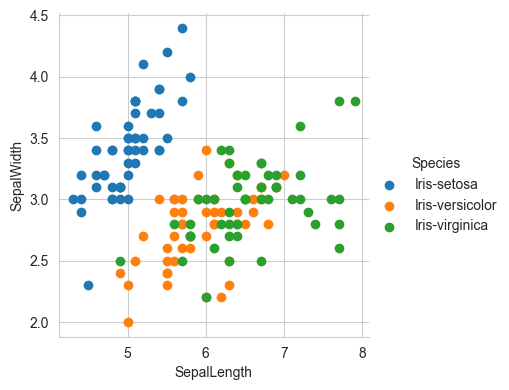

In [94]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="Species", height=4) \
    .map(plt.scatter,"SepalLength","SepalWidth") \
    .add_legend()
plt.show()

**Pairwise Scatter Plot**

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


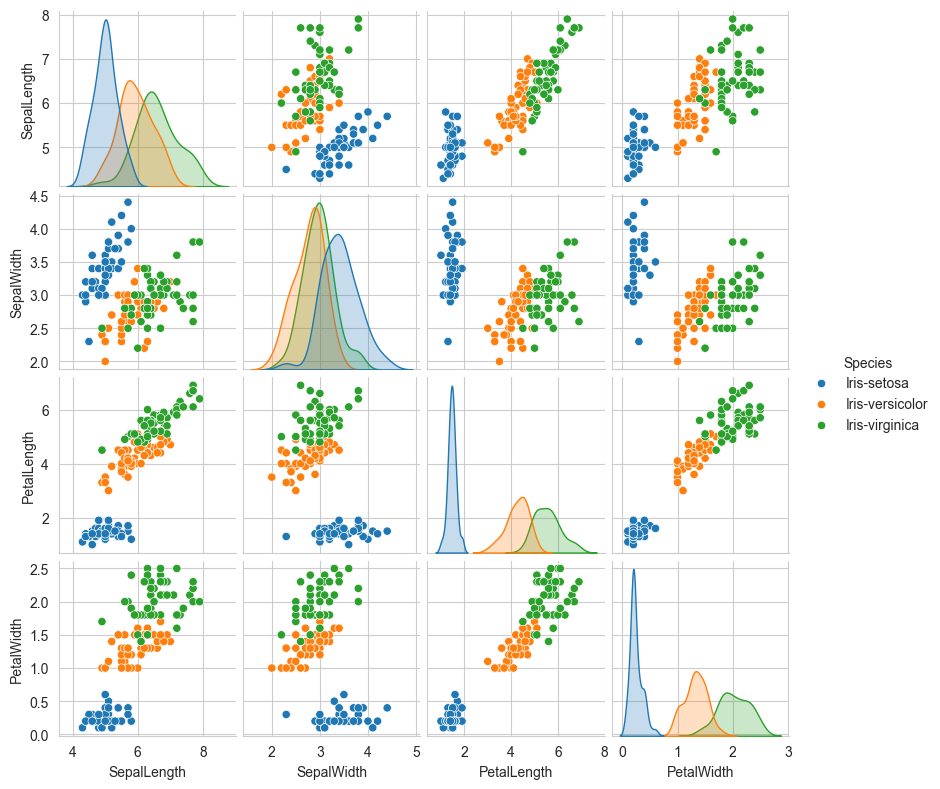

In [95]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="Species",size=2,aspect=1)
plt.show()

# Data Preprocessing
<hr>

In [96]:
dataset["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [97]:
dataset.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [98]:
dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking for Null Values**

In [99]:
dataset.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [100]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Label Encoding**

In [101]:
label_encoder = preprocessing.LabelEncoder() 
dataset['Species']= label_encoder.fit_transform(dataset['Species']) 

dataset['Species'].unique()

array([0, 1, 2])

In [102]:
#X = dataset.drop(["Species"], axis=1)
#y = dataset["Species"]

**Splitting Dataset**

In [ ]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [104]:
len(X)

150

In [105]:
len(y)

150

**Heatmap which highlights the degree of correlation between features**

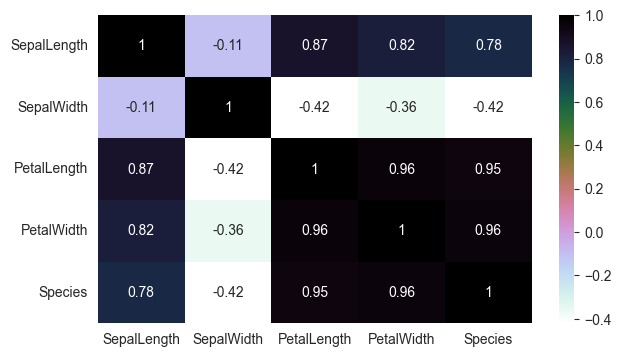

In [106]:
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r')
plt.show()

# Model Development
<hr>

**Splitting the dataset for training and testing**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

**Feature Scaling**

In [108]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the test results**

In [110]:
y_pred = classifier.predict(X_test)

**Making the confusion matrix**

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]])

### Visualization

**Visualising the Training set results**

C:\Users\aryan\AppData\Local\Temp\ipykernel_21568\4133020138.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


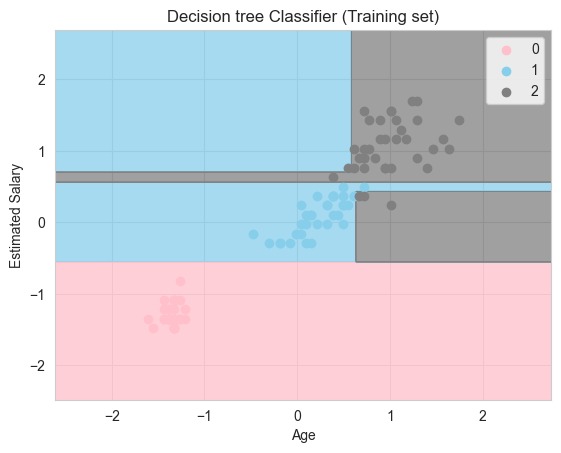

In [112]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink','skyblue','gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'skyblue','gray'))(i), label = j)
plt.title('Decision tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

C:\Users\aryan\AppData\Local\Temp\ipykernel_21568\474813364.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


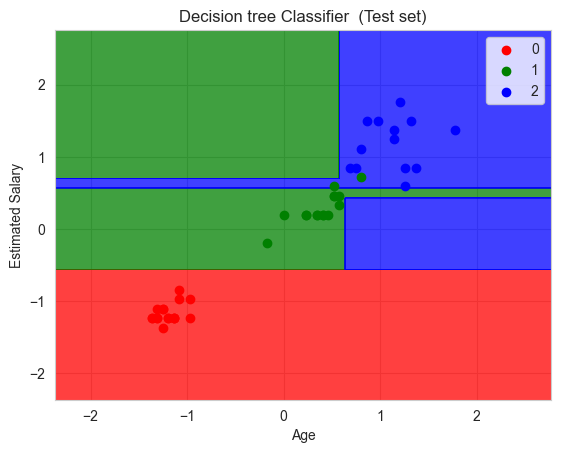

In [113]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision tree Classifier  (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Accuracy**

In [114]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print('The accuracy of the Decision Tree Classifier is : %.2f'%accuracy_score(y_pred,y_test))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, y_pred))

The accuracy of the Decision Tree Classifier is : 0.96
RMSE value = 0.21
R2 Score= 0.93


In [115]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        17\n           1       1.00      0.87      0.93        15\n           2       0.87      1.00      0.93        13\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.95        45\nweighted avg       0.96      0.96      0.96        45\n'

## KNN Algorithm

In [116]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [117]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
predict = model.predict(X_test)

**Accuracy**

In [119]:
#for checking the model accuracy
print('The accuracy of the KNN is',accuracy_score(predict,y_test))
rmse = sqrt(mean_squared_error(y_test, predict))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, predict))


The accuracy of the KNN is 0.9555555555555556
RMSE value = 0.21
R2 Score= 0.93


## SVC

In [120]:
from sklearn import svm
svc = svm.SVC(C=1.0, kernel='rbf')

In [121]:
svc.fit(X_train,y_train)

SVC()

In [122]:
pred = svc.predict(X_test)

**validation**

In [123]:
print('The accuracy of the SVM is: %.2f'%accuracy_score(pred,y_test))
rmse = sqrt(mean_squared_error(y_test, pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, pred))

The accuracy of the SVM is: 0.98
RMSE value = 0.15
R2 Score= 0.97


# Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train,y_train) 
prediction=model.predict(X_test) 


**Accuracy**

In [125]:
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
rmse = sqrt(mean_squared_error(y_test, prediction))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
RMSE value = 0.15
R2 Score= 0.97


# Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train) 
predicted= model.predict(X_test) 

**Accuracy**

In [127]:
print('The accuracy of the naive_bayes is:',accuracy_score(predicted,y_test))
rmse = sqrt(mean_squared_error(y_test, predicted))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, predicted))

The accuracy of the naive_bayes is: 0.9777777777777777
RMSE value = 0.15
R2 Score= 0.97
